# Rede Hidrometeorológica Nacional

Trabalhando com os dados da Rede Hidrometeorológica Nacional, da Agência Nacional de Águas (ANA).

O que vamos fazer hoje:

* baixar 2 shapefiles (drainage e estações) (https://metadados.snirh.gov.br/, procurar por Rede Hidrometeorológica Nacional)
* visualizar o mapa
* importar os dados de precipitação

## Importando bibliotecas

In [ ]:
import requests
import zipfile
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import shapely
from shapely import geometry, ops
import fiona
import geopandas as gpd
from datetime import datetime, timedelta

In [ ]:
# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "rede_estacoes_ANA"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "2024-03-14_Estacoes_Rede_Hidrometeorologica_Nacional.zip", "wb") as f:
  request = requests.get("https://github.com/emiliomercuri/EnvHidrology2024/raw/4f8c68aca7ecc91615efe0249fa5f09da27c1d5e/aulas/2024_03_14-Aula_06/2024-03-14_Estacoes_Rede_Hidrometeorologica_Nacional.zip")
  print("Donwloading data...")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_path / "2024-03-14_Estacoes_Rede_Hidrometeorologica_Nacional.zip", "r") as zip_ref:
  print("Unzipping shapefile estacoes...")
  zip_ref.extractall(image_path)


# Deletar uma pasta criada pelo Compactador
!rm -rf /content/data/rede_estacoes_ANA/__MACOSX

# Cria um diretório para armazenar as imagens
!mkdir img

data/rede_estacoes_ANA does not exist, creating one...
Donwloading data...
Unzipping shapefile estacoes...


In [ ]:
# Atualizar o Google Download
#!pip install --upgrade --no-cache-dir gdown

In [ ]:
# download dos arquivos CABra_boundaries shapefiles
!gdown '1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc'

# download dos arquivos CABra_drainage shapefiles
!gdown '1bEm11pOrOkwYyt9USixtMMPpneaWUVMl'

# cria uma pasta para armazenar os arquivos shapefile
!mkdir shapefiles_CABra

!unzip CABra_boundaries.zip -d shapefiles_CABra

!unzip CABra_drainage.zip -d shapefiles_CABra

Downloading...
From (original): https://drive.google.com/uc?id=1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc
From (redirected): https://drive.google.com/uc?id=1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc&confirm=t&uuid=246d978d-df1d-4ee9-8091-8aa914d50f73
To: /content/CABra_boundaries.zip
100% 48.0M/48.0M [00:00<00:00, 121MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1bEm11pOrOkwYyt9USixtMMPpneaWUVMl
From (redirected): https://drive.google.com/uc?id=1bEm11pOrOkwYyt9USixtMMPpneaWUVMl&confirm=t&uuid=e3dc4178-1e59-4a65-84f3-b6a7cc0ddf2d
To: /content/CABra_drainage.zip
100% 50.0M/50.0M [00:00<00:00, 129MB/s]
Archive:  CABra_boundaries.zip
  inflating: shapefiles_CABra/CABra_boundaries.shx  
  inflating: shapefiles_CABra/CABra_boundaries.cpg  
  inflating: shapefiles_CABra/CABra_boundaries.dbf  
  inflating: shapefiles_CABra/CABra_boundaries.prj  
  inflating: shapefiles_CABra/CABra_boundaries.sbn  
  inflating: shapefiles_CABra/CABra_boundaries.sbx  
  inflating: shapefiles_CABra/CABra_bou

In [ ]:
shp_CABra = gpd.read_file('shapefiles_CABra/CABra_boundaries.shp')
drainage_CABra = gpd.read_file('shapefiles_CABra/CABra_drainage/CABra_drainage.shp')
rede_ANA = gpd.read_file('data/rede_estacoes_ANA/Estacoes_Rede_Hidrometeorologica_Nacional/Estacoes_Fluviometricas_e_Pluviometricas_da_Rede.shp')

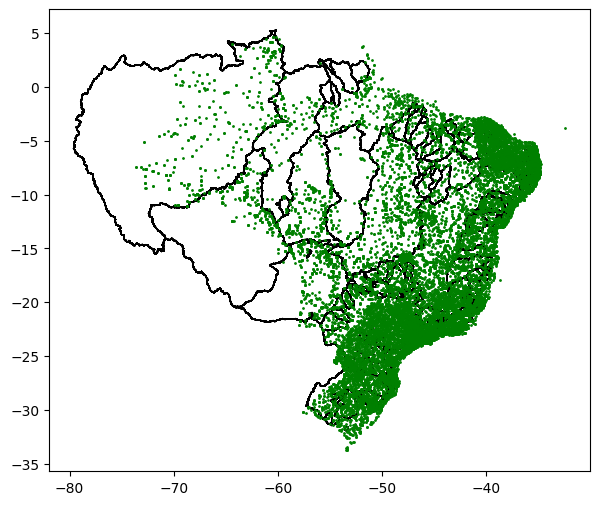

In [ ]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
shp_CABra.plot(ax=ax,color='white', edgecolor='black')
rede_ANA.plot(ax=ax,marker='o', color='green', markersize=1)
plt.show()

In [ ]:
shp_CABra.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
rede_ANA.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
drainage_CABra.crs

<Projected CRS: EPSG:5880>
Name: SIRGAS 2000 / Brazil Polyconic
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore and offshore. Includes Rocas, Fernando de Noronha archipelago, Trindade, Ihlas Martim Vaz and Sao Pedro e Sao Paulo.
- bounds: (-74.01, -35.71, -25.28, 7.04)
Coordinate Operation:
- name: Brazil Polyconic
- method: American Polyconic
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

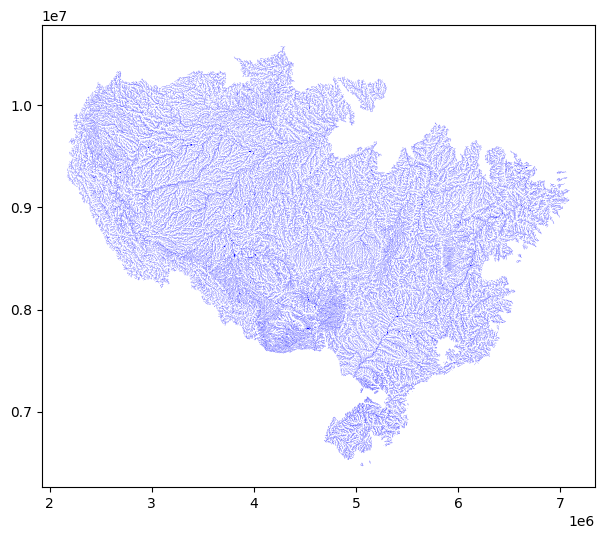

In [ ]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
drainage_CABra.plot(ax=ax,color='blue', linewidth=0.1)
plt.show()

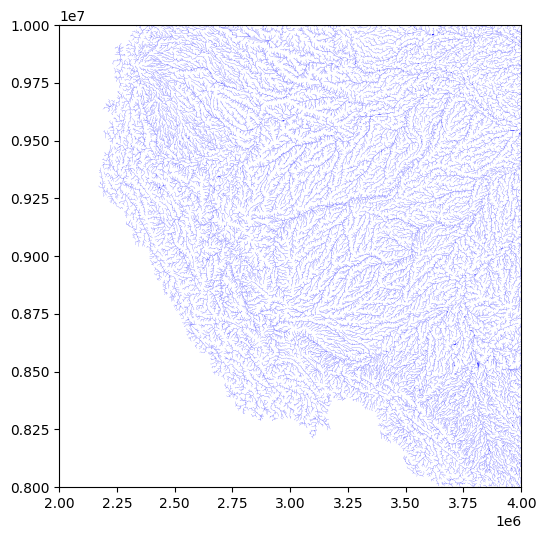

In [ ]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
drainage_CABra.plot(ax=ax,color='blue', linewidth=0.1)
plt.xlim([2000000, 4000000])
plt.ylim([8000000, 10000000])
plt.show()

In [ ]:
drainage_CABra2 = drainage_CABra.to_crs({'init':'epsg:4326'})

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


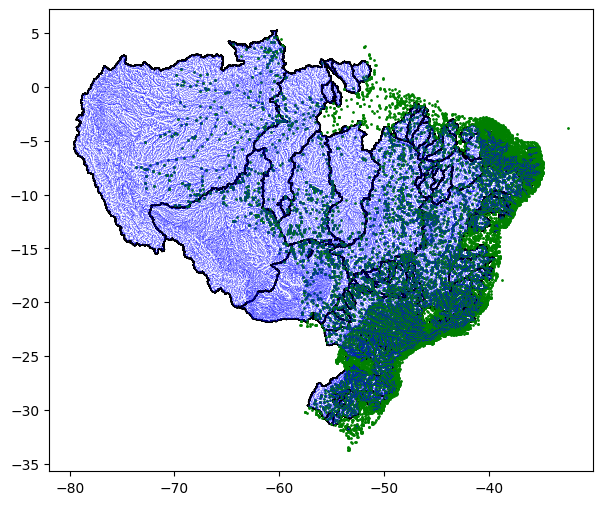

In [ ]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
shp_CABra.plot(ax=ax,color='white', edgecolor='black')
rede_ANA.plot(ax=ax,marker='o', color='green', markersize=1)
drainage_CABra2.plot(ax=ax,color='blue', linewidth=0.2)
plt.show()

# Selecionando a bacia de interesse e os dados das estações próximas

In [ ]:
# Encontrando a linha do dataframe que tem o ID_CABra == 1
shp_CABra[shp_CABra['ID_CABra']==1]

,area_CABra,gauge_ANA,ID_CABra,X_outlet,Y_outlet,geometry
352,243410.278886,13880000.0,1.0,-64.384,-6.541,"MULTIPOLYGON (((-68.44875 -7.14875, -68.44708 ..."


In [ ]:
shp_CABra.loc[352]

area_CABra                                        243410.278886
gauge_ANA                                            13880000.0
ID_CABra                                                    1.0
X_outlet                                                -64.384
Y_outlet                                                 -6.541
geometry      MULTIPOLYGON (((-68.4487499994223 -7.148749999...
Name: 352, dtype: object

In [ ]:
#get shape from watershed 352
shape_352 = shp_CABra.loc[shp_CABra['ID_CABra']==1]

## Encontrando o centróide da bacia

In [ ]:
centroide = shapely.centroid(shape_352['geometry'])
centroide

352    POINT (-68.02804 -8.98924)
Name: geometry, dtype: geometry

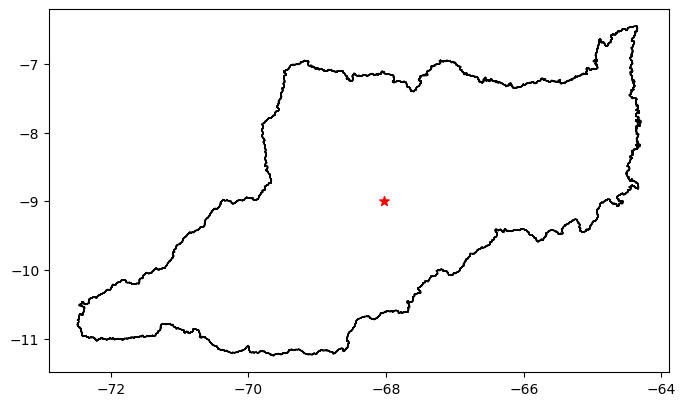

In [ ]:
# Plot all the catchment and centroid
fig, ax = plt.subplots(figsize=(8,6))
shape_352.plot(ax=ax,color='white', edgecolor='black')
centroide.plot(ax=ax,marker='*', color='red', markersize=50)
plt.show()

# Criar um raio em torno do centróide da bacia

* Raio = 5 graus

In [ ]:
raio = centroide.buffer(5)
raio

352    POLYGON ((-63.02804 -8.98924, -63.05211 -9.479...
dtype: geometry

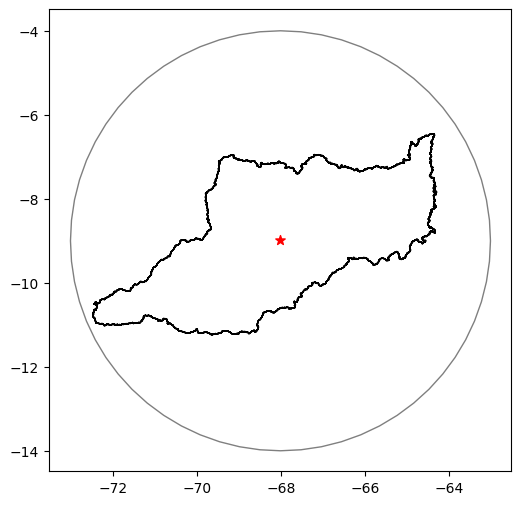

In [ ]:
# Plot all the catchment and centroid
fig, ax = plt.subplots(figsize=(8,6))
raio.plot(ax=ax,color='white', edgecolor='black', alpha=0.5)
shape_352.plot(ax=ax,color='white', edgecolor='black')
centroide.plot(ax=ax,marker='*', color='red', markersize=50)
plt.show()

# Recortar as estações próximas do centróide com certo raio

## Geopandas.clip

In [ ]:
rede_ANA.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
raio = raio.set_crs(crs=4326)

In [ ]:
raio.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
drainage_CABra2 = drainage_CABra2.to_crs(crs=4326)

In [ ]:
estacoes_proximas = gpd.clip(rede_ANA, raio)
estacoes_dentro = gpd.clip(rede_ANA, shape_352)
hidrografia_proxima = gpd.clip(drainage_CABra2, shape_352)
estacoes_proximas

,EST_ID,REGISTROID,BACIA,RIO,ESTADO,MUNICIPIO,RESPONSAVE,OPERADORA,OPERADORA_,ROTEIRO,...,PERIODOREG,PERIODODES,PERIODOSED,PERIODOQUA,PERIODOPLU,PERIODOR_1,PERIODOTAN,PERIODOCLI,PERIODOTEL,geometry
4156,35774,3741675,RIO AMAZONAS,None,RO,COSTA MARQUES,ANA,CPRM,REPO,97,...,None,None,None,None,1983-04-01,None,None,None,2002-07-01,POINT (-64.42250 -12.42690)
12769,58,3730167,RIO AMAZONAS,RIO GUAPORÉ,RO,COSTA MARQUES,ANA,CPRM,REPO,97,...,None,1983-04-01,None,2010-01-01,None,None,None,None,2002-07-01,POINT (-64.42530 -12.42670)
12770,56,54915956,RIO AMAZONAS,RIO GUAPORÉ,RO,COSTA MARQUES,SEDAM-RO,SEDAM-RO,None,None,...,None,None,None,2000-01-01,None,None,None,None,None,POINT (-64.42530 -12.42670)
4159,35772,52303540,RIO AMAZONAS,None,RO,COSTA MARQUES,ESBR,ESBR,None,1,...,None,None,None,None,2012-08-01,None,None,None,2012-08-01,POINT (-64.42530 -12.42670)
12771,55,52303541,RIO AMAZONAS,RIO GUAPORÉ,RO,COSTA MARQUES,ESBR,ESBR,None,1,...,None,2012-08-01,None,None,None,None,None,None,2012-08-01,POINT (-64.42530 -12.42670)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12535,13826,3729967,RIO AMAZONAS,RIO ITACUAI,AM,ATALAIA DO NORTE,ANA,COHIDRO,None,1,...,None,1997-06-01,None,2016-10-01,None,None,None,None,2017-09-01,POINT (-70.26440 -4.58360)
1115,34710,41626336,RIO AMAZONAS,None,AM,JUTAÍ,ANA,COHIDRO,None,3,...,None,None,None,None,2009-04-01,None,None,None,None,POINT (-68.01110 -4.57110)
12543,934,41626337,RIO AMAZONAS,RIO JUTAÍ,AM,JUTAÍ,ANA,COHIDRO,None,3,...,None,2009-04-01,None,2016-10-01,None,None,None,None,None,POINT (-68.01110 -4.57110)
12536,13248,19356737,RIO AMAZONAS,RIO SOLIMÕES/AMAZONAS,AM,TABATINGA,ANA,COHIDRO,None,1,...,None,1977-12-01,1981-11-01,1978-01-01,None,None,None,None,None,POINT (-69.73360 -4.35780)


# Selecionar as estações fluviométricas e pluviométricas

In [ ]:
pluviometricas = estacoes_proximas[estacoes_proximas['TIPOESTACA'] == 'Pluviométrica']
fluviometricas = estacoes_proximas[estacoes_proximas['TIPOESTACA'] == 'Fluviométrica']

pluv_in = estacoes_dentro[estacoes_dentro['TIPOESTACA'] == 'Pluviométrica']
fluv_in = estacoes_dentro[estacoes_dentro['TIPOESTACA'] == 'Fluviométrica']

In [ ]:
len(estacoes_proximas), len(pluviometricas), len(fluviometricas)

(235, 122, 113)

In [ ]:
#get shape
shape_exutoria = rede_ANA.loc[rede_ANA['CODIGO'] == 13880000]

In [ ]:
#get shape from 3026
shape_3026 = rede_ANA.loc[rede_ANA['CODIGO'] == 865000]

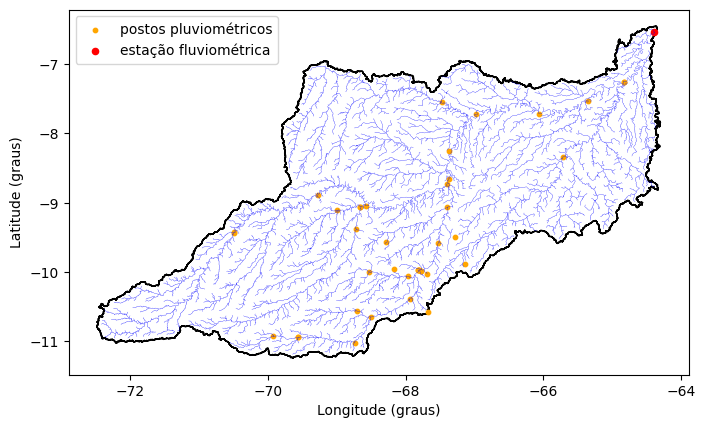

In [ ]:
# Plot all the catchment and hidrometric station
fig, ax = plt.subplots(figsize=(8,6))
#raio.plot(ax=ax,color='white', edgecolor='black', alpha=0.5)
shape_352.plot(ax=ax,color='white', edgecolor='black')
hidrografia_proxima.plot(ax=ax,color='blue', linewidth=0.2)
#centroide.plot(ax=ax,marker='*', color='red', markersize=50, alpha=0.9)
#pluv_in.plot(ax=ax,marker='o', color='green', markersize=2)
pluv_in.plot(ax=ax,marker='o', color='orange', markersize=10, label='postos pluviométricos', alpha=1.0)
#fluviometricas.plot(ax=ax,marker='s', color='blue', markersize=2, alpha=0.5)
#shape_3026.plot(ax=ax,marker='o', color='orange', markersize=10, label='postos pluviométricos', alpha=1.0)
shape_exutoria.plot(ax=ax,marker='o', color='red', markersize=20, label='estação fluviométrica', alpha=1.0)
plt.xlabel('Longitude (graus)')
plt.ylabel('Latitude (graus)')
plt.legend()
plt.show()

In [ ]:
shape_exutoria

,EST_ID,REGISTROID,BACIA,RIO,ESTADO,MUNICIPIO,RESPONSAVE,OPERADORA,OPERADORA_,ROTEIRO,...,PERIODOREG,PERIODODES,PERIODOSED,PERIODOQUA,PERIODOPLU,PERIODOR_1,PERIODOTAN,PERIODOCLI,PERIODOTEL,geometry
12620,7476,3730064,RIO AMAZONAS,RIO PURUS,AM,CANUTAMA,ANA,CONSTRUFAM,CONSTRUFAM-RO,1,...,None,1967-06-01,2008-07-01,2007-07-01,None,None,None,None,2004-11-01,POINT (-64.38580 -6.53890)


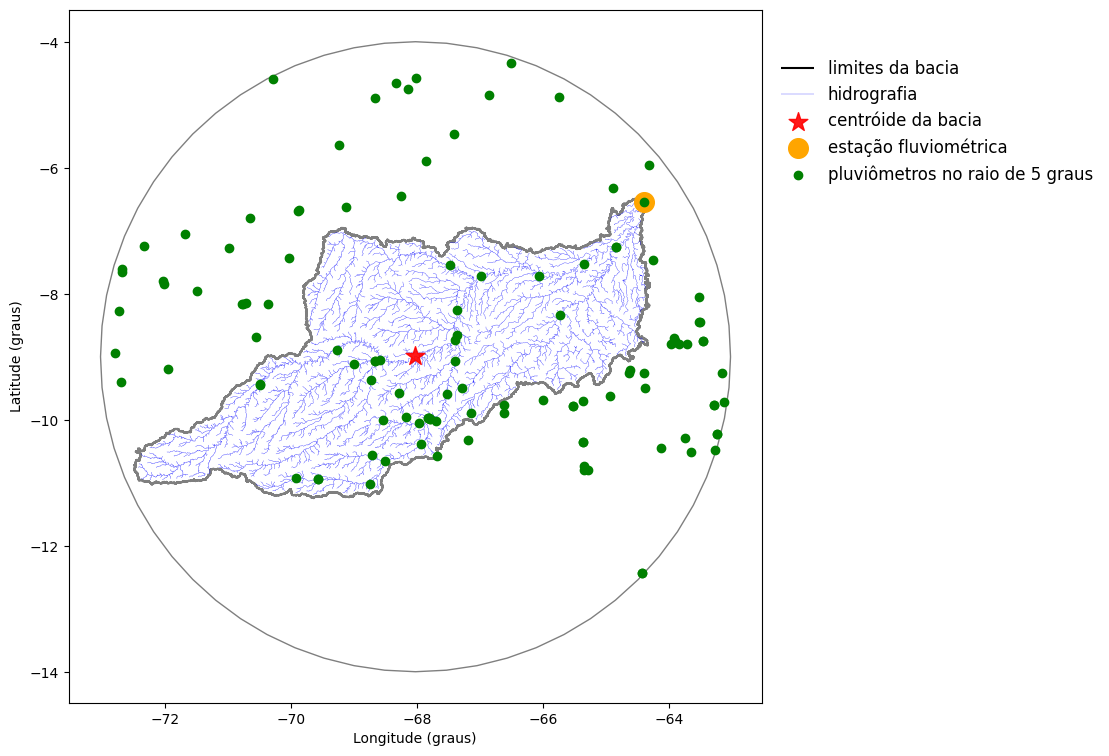

In [ ]:
# Plot all the data
fig, ax = plt.subplots(figsize=(9,9))
raio.plot(ax=ax,color='white', edgecolor='black', alpha=0.5,zorder=1)
#shape_352.plot(ax=ax,color='white', edgecolor='black',zorder=2, label = 'limites da bacia')
shape_352.geometry.boundary.plot(ax = ax, alpha = 1, color = None, edgecolor =  "black", label = 'limites da bacia',zorder=0)

hidrografia_proxima.plot(ax=ax,color='blue', linewidth=0.2,zorder=3, label = 'hidrografia')
centroide.plot(ax=ax,marker='*', color='red', markersize=200, alpha=0.9, label = 'centróide da bacia',zorder=4)

ax.scatter(shape_exutoria['LONGITUDE'], shape_exutoria['LATITUDE'], s=200, color = "orange", label = 'estação fluviométrica',zorder=5)
ax.scatter(pluviometricas['LONGITUDE'], pluviometricas['LATITUDE'], color = "green", label = 'pluviômetros no raio de 5 graus',zorder=6)

plt.xlabel('Longitude (graus)')
plt.ylabel('Latitude (graus)')

plt.legend(loc="upper right",bbox_to_anchor=(1.5, 0.95), frameon=False, fontsize=12)

# Show the plot
plt.savefig('pluviometros_raio_5graus.png', dpi = 100, bbox_inches='tight')
#plt.savefig('Mutations_bars_correlation.pdf', dpi = 600, bbox_inches='tight')
plt.show();

In [ ]:
len(pluviometricas)

122

## Escolher estações pluviométricas

Comparar série de dados pluviométricas

In [ ]:
pluviometricas.columns

Index(['EST_ID', 'REGISTROID', 'BACIA', 'RIO', 'ESTADO', 'MUNICIPIO',
       'RESPONSAVE', 'OPERADORA', 'OPERADORA_', 'ROTEIRO', 'TIPOESTACA',
       'CODIGO', 'NOME', 'LATITUDE', 'LONGITUDE', 'AREADRENAG', 'OPERANDO',
       'TIPOESTA_1', 'TIPOESTA_2', 'TIPOESTA_3', 'TIPOESTA_4', 'TIPOESTA_5',
       'TIPOESTA_6', 'TIPOESTA_7', 'TIPOESTA_8', 'TIPOESTA_9', 'TIPOEST_10',
       'TIPOREDEBA', 'TIPOREDEEN', 'TIPOREDENA', 'TIPOREDECU', 'TIPOREDEES',
       'TIPOREDECA', 'TIPOREDESE', 'TIPOREDEQU', 'TIPOREDECL', 'PERIODOESC',
       'PERIODOREG', 'PERIODODES', 'PERIODOSED', 'PERIODOQUA', 'PERIODOPLU',
       'PERIODOR_1', 'PERIODOTAN', 'PERIODOCLI', 'PERIODOTEL', 'geometry'],
      dtype='object')

In [ ]:
pluv_in_sel_col = pluv_in[['CODIGO','OPERANDO','PERIODOPLU','geometry']]
pluv_prox_sel_col = pluviometricas[['CODIGO','OPERANDO','PERIODOPLU','geometry']]
pluv_prox_sel_col

,CODIGO,OPERANDO,PERIODOPLU,geometry
4156,1264000,Sim,1983-04-01,POINT (-64.42250 -12.42690)
4159,1264004,Sim,2012-08-01,POINT (-64.42530 -12.42670)
3863,1168001,Sim,1980-10-01,POINT (-68.73500 -11.02330)
3612,1069000,Sim,1980-06-01,POINT (-69.56560 -10.94360)
3613,1069004,Sim,None,POINT (-69.56560 -10.94360)
...,...,...,...,...
1117,468004,Sim,1999-11-01,POINT (-68.13500 -4.74170)
1118,468005,Sim,2019-03-01,POINT (-68.32440 -4.65140)
1124,470009,Sim,1998-06-01,POINT (-70.28110 -4.58360)
1115,467002,Sim,2009-04-01,POINT (-68.01110 -4.57110)


In [ ]:
pluv_prox_sel_col

,CODIGO,OPERANDO,PERIODOPLU,geometry
4156,1264000,Sim,1983-04-01,POINT (-64.42250 -12.42690)
4159,1264004,Sim,2012-08-01,POINT (-64.42530 -12.42670)
3863,1168001,Sim,1980-10-01,POINT (-68.73500 -11.02330)
3612,1069000,Sim,1980-06-01,POINT (-69.56560 -10.94360)
3613,1069004,Sim,None,POINT (-69.56560 -10.94360)
...,...,...,...,...
1117,468004,Sim,1999-11-01,POINT (-68.13500 -4.74170)
1118,468005,Sim,2019-03-01,POINT (-68.32440 -4.65140)
1124,470009,Sim,1998-06-01,POINT (-70.28110 -4.58360)
1115,467002,Sim,2009-04-01,POINT (-68.01110 -4.57110)


In [ ]:
# Remover as estações que têm PERIODOPLU = None
pluv_prox_sel_col2 = pluv_prox_sel_col.mask(pluv_prox_sel_col.eq('None')).dropna()
pluv_prox_sel_col2

,CODIGO,OPERANDO,PERIODOPLU,geometry
4156,1264000,Sim,1983-04-01,POINT (-64.42250 -12.42690)
4159,1264004,Sim,2012-08-01,POINT (-64.42530 -12.42670)
3863,1168001,Sim,1980-10-01,POINT (-68.73500 -11.02330)
3612,1069000,Sim,1980-06-01,POINT (-69.56560 -10.94360)
3599,1065002,Sim,1972-08-01,POINT (-65.34780 -10.79250)
...,...,...,...,...
1117,468004,Sim,1999-11-01,POINT (-68.13500 -4.74170)
1118,468005,Sim,2019-03-01,POINT (-68.32440 -4.65140)
1124,470009,Sim,1998-06-01,POINT (-70.28110 -4.58360)
1115,467002,Sim,2009-04-01,POINT (-68.01110 -4.57110)


In [ ]:
# Configurar PERIODOPLU como datetime
pluv_prox_sel_col2['PERIODOPLU'] = pd.to_datetime(pluv_prox_sel_col2["PERIODOPLU"])
pluv_prox_sel_col2 = pluv_prox_sel_col2.set_index('PERIODOPLU')
pluv_prox_sel_col2

,CODIGO,OPERANDO,geometry
PERIODOPLU,,,
1983-04-01,1264000,Sim,POINT (-64.42250 -12.42690)
2012-08-01,1264004,Sim,POINT (-64.42530 -12.42670)
1980-10-01,1168001,Sim,POINT (-68.73500 -11.02330)
1980-06-01,1069000,Sim,POINT (-69.56560 -10.94360)
1972-08-01,1065002,Sim,POINT (-65.34780 -10.79250)
...,...,...,...
1999-11-01,468004,Sim,POINT (-68.13500 -4.74170)
2019-03-01,468005,Sim,POINT (-68.32440 -4.65140)
1998-06-01,470009,Sim,POINT (-70.28110 -4.58360)


In [ ]:
# Selecionar apenas as estações que tem medições antes de 1980
pluv_prox_sel_col3 = pluv_prox_sel_col2[pluv_prox_sel_col2.index.year<1980]
pluv_prox_sel_col3

,CODIGO,OPERANDO,geometry
PERIODOPLU,,,
1972-08-01,1065002,Sim,POINT (-65.34780 -10.79250)
1977-12-01,1068000,Sim,POINT (-68.50670 -10.64970)
1978-10-01,1063000,Sim,POINT (-63.64610 -10.50500)
1971-01-01,967002,Sim,POINT (-67.78330 -9.98330)
1929-01-01,967000,Sim,POINT (-67.80000 -9.97580)
1977-12-01,966000,Sim,POINT (-66.61170 -9.75560)
1976-02-01,965001,Sim,POINT (-65.36470 -9.70310)
1977-12-01,963001,Sim,POINT (-63.16190 -9.26060)
1972-07-01,967001,Sim,POINT (-67.39690 -9.06670)


In [ ]:
len(pluv_prox_sel_col3)

24

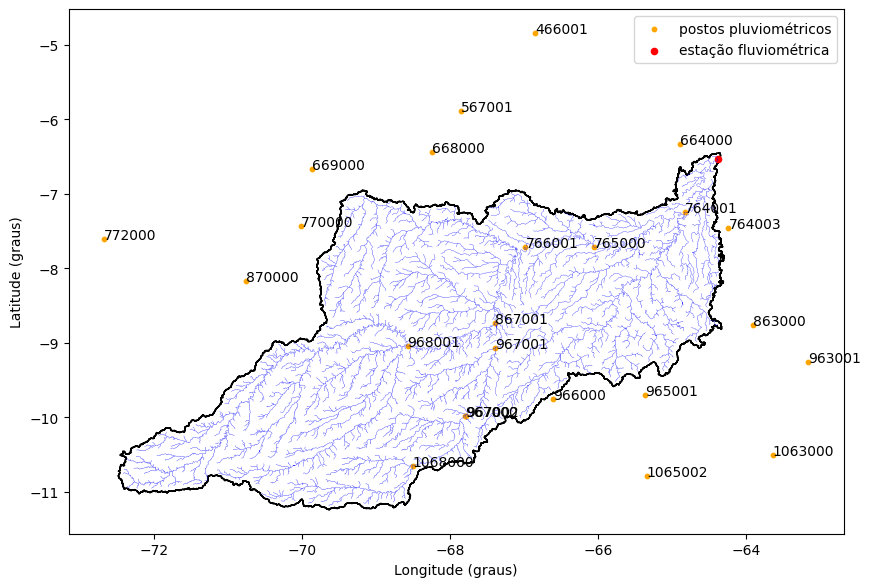

In [ ]:
# Plot all the catchment and hidrometric station
fig, ax = plt.subplots(figsize=(10,8))
#raio.plot(ax=ax,color='white', edgecolor='black', alpha=0.5)
shape_352.plot(ax=ax,color='white', edgecolor='black')
hidrografia_proxima.plot(ax=ax,color='blue', linewidth=0.2)
#centroide.plot(ax=ax,marker='*', color='red', markersize=50, alpha=0.9)
#pluv_in.plot(ax=ax,marker='o', color='green', markersize=2)
pluv_prox_sel_col3.plot(ax=ax,marker='o', color='orange', markersize=10, label='postos pluviométricos', alpha=1.0)
shape_exutoria.plot(ax=ax,marker='o', color='red', markersize=20, label='estação fluviométrica', alpha=1.0)

pluv = pluv_prox_sel_col3.copy()

texts = []
for x, y, label in zip(pluv.geometry.x, pluv.geometry.y, pluv["CODIGO"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

plt.xlabel('Longitude (graus)')
plt.ylabel('Latitude (graus)')
plt.legend()

# Show the plot
plt.savefig('pluviometros_raio_5km1980.png', dpi = 100, bbox_inches='tight')
#plt.savefig('Mutations_bars_correlation.pdf', dpi = 600, bbox_inches='tight')
plt.show();

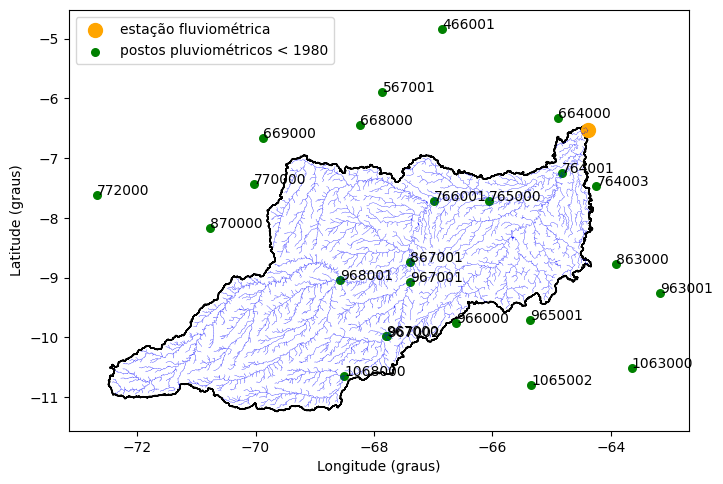

In [ ]:
# Plot all the catchment and hidrometric station
fig, ax = plt.subplots(figsize=(8,6))
shape_352.plot(ax=ax,color='white', edgecolor='black')
hidrografia_proxima.plot(ax=ax,color='blue', linewidth=0.2)
shape_exutoria.plot(ax=ax,marker='o', color='orange', markersize=100, label='estação fluviométrica', alpha=1.0)

pluv_prox_sel_col3.plot(ax=ax,marker='o', color='green', markersize=30, label='postos pluviométricos < 1980', alpha=1.0)
pluv = pluv_prox_sel_col3.copy()

texts = []
for x, y, label in zip(pluv.geometry.x, pluv.geometry.y, pluv["CODIGO"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

plt.xlabel('Longitude (graus)')
plt.ylabel('Latitude (graus)')
plt.legend()

# Show the plot
plt.savefig('pluviometros_raio_5km1980.png', dpi = 100, bbox_inches='tight')
#plt.savefig('Mutations_bars_correlation.pdf', dpi = 600, bbox_inches='tight')
plt.show();

# Lista pluviômetros

In [ ]:
N = len(pluv_prox_sel_col3)
lista_plu = list(pluv_prox_sel_col3['CODIGO'].values)

print('Temos ', N, 'pluviômetros, são eles:')

print(lista_plu)

Temos  24 pluviômetros, são eles:
[1065002, 1068000, 1063000, 967002, 967000, 966000, 965001, 963001, 967001, 968001, 863000, 867001, 870000, 766001, 765000, 772000, 764003, 770000, 764001, 669000, 668000, 664000, 567001, 466001]


## Baixar dados do Hidroweb

Baixar dados das 24 estações, vou usar todas as estações na espacialização da chuva.

Porém, por simplificação e por ser um exemplo de aula vou escolher apenas 3 estações para ilustrar a espacialização. Estações:

3 pluviometros internos

* 865000 (baixei na última aula)
* 869000
* 1168001


Acessar https://www.snirh.gov.br/hidroweb/ e baixar os dados txt. Refazer o procedimento da última aula para transformar os dados em apenas duas colunas de arquivo CSV.

## Selecione as linhas onde o valor da coluna está na lista de valores



In [ ]:
pluv_prox_sel_col3

,CODIGO,OPERANDO,geometry
PERIODOPLU,,,
1972-08-01,1065002,Sim,POINT (-65.34780 -10.79250)
1977-12-01,1068000,Sim,POINT (-68.50670 -10.64970)
1978-10-01,1063000,Sim,POINT (-63.64610 -10.50500)
1971-01-01,967002,Sim,POINT (-67.78330 -9.98330)
1929-01-01,967000,Sim,POINT (-67.80000 -9.97580)
1977-12-01,966000,Sim,POINT (-66.61170 -9.75560)
1976-02-01,965001,Sim,POINT (-65.36470 -9.70310)
1977-12-01,963001,Sim,POINT (-63.16190 -9.26060)
1972-07-01,967001,Sim,POINT (-67.39690 -9.06670)


In [ ]:
pluv_prox_sel_col4 = pluv_prox_sel_col3.loc[pluv_prox_sel_col3['CODIGO'].isin(lista_plu)]
pluv_prox_sel_col4

,CODIGO,OPERANDO,geometry
PERIODOPLU,,,
1972-08-01,1065002,Sim,POINT (-65.34780 -10.79250)
1977-12-01,1068000,Sim,POINT (-68.50670 -10.64970)
1978-10-01,1063000,Sim,POINT (-63.64610 -10.50500)
1971-01-01,967002,Sim,POINT (-67.78330 -9.98330)
1929-01-01,967000,Sim,POINT (-67.80000 -9.97580)
1977-12-01,966000,Sim,POINT (-66.61170 -9.75560)
1976-02-01,965001,Sim,POINT (-65.36470 -9.70310)
1977-12-01,963001,Sim,POINT (-63.16190 -9.26060)
1972-07-01,967001,Sim,POINT (-67.39690 -9.06670)


# Exportando os Shapefiles que vamos usar na sequência da análise

* shape_352
* hidrografia_proxima
* pluv_in_sel
* shape_exutoria



In [ ]:
!mkdir shapefiles

In [ ]:
!mkdir shapefiles/bacia
!mkdir shapefiles/hidro
!mkdir shapefiles/pluvio
!mkdir shapefiles/exuto

In [ ]:
pluv_prox_sel_col5 = pluv_prox_sel_col4.reset_index()

In [ ]:
pluv_prox_sel_col5.dtypes

PERIODOPLU    datetime64[ns]
CODIGO                 int64
OPERANDO              object
geometry            geometry
dtype: object

In [ ]:
pluv_prox_sel_col5

,PERIODOPLU,CODIGO,OPERANDO,geometry
0,1972-08-01,1065002,Sim,POINT (-65.34780 -10.79250)
1,1977-12-01,1068000,Sim,POINT (-68.50670 -10.64970)
2,1978-10-01,1063000,Sim,POINT (-63.64610 -10.50500)
3,1971-01-01,967002,Sim,POINT (-67.78330 -9.98330)
4,1929-01-01,967000,Sim,POINT (-67.80000 -9.97580)
5,1977-12-01,966000,Sim,POINT (-66.61170 -9.75560)
6,1976-02-01,965001,Sim,POINT (-65.36470 -9.70310)
7,1977-12-01,963001,Sim,POINT (-63.16190 -9.26060)
8,1972-07-01,967001,Sim,POINT (-67.39690 -9.06670)
9,1972-11-01,968001,Sim,POINT (-68.57720 -9.04390)


In [ ]:
pluv_selecionados = pluv_prox_sel_col5[['CODIGO','geometry']]

In [ ]:
shape_352.to_file('shapefiles/bacia/bacia.shp')
hidrografia_proxima.to_file('shapefiles/hidro/hidro.shp')
pluv_selecionados.to_file('shapefiles/pluvio/pluvio.shp')
shape_exutoria.to_file('shapefiles/exuto/exuto.shp')

In [ ]:
!zip -r /content/bacia.zip /content/shapefiles/bacia/
!zip -r /content/hidro.zip /content/shapefiles/hidro/
!zip -r /content/pluvio.zip /content/shapefiles/pluvio/
!zip -r /content/exuto.zip /content/shapefiles/exuto/

  adding: content/shapefiles/bacia/ (stored 0%)
  adding: content/shapefiles/bacia/bacia.cpg (stored 0%)
  adding: content/shapefiles/bacia/bacia.dbf (deflated 61%)
  adding: content/shapefiles/bacia/bacia.shp (deflated 41%)
  adding: content/shapefiles/bacia/bacia.prj (deflated 17%)
  adding: content/shapefiles/bacia/bacia.shx (deflated 45%)
  adding: content/shapefiles/hidro/ (stored 0%)
  adding: content/shapefiles/hidro/hidro.prj (deflated 17%)
  adding: content/shapefiles/hidro/hidro.shp (deflated 47%)
  adding: content/shapefiles/hidro/hidro.cpg (stored 0%)
  adding: content/shapefiles/hidro/hidro.dbf (deflated 82%)
  adding: content/shapefiles/hidro/hidro.shx (deflated 54%)
  adding: content/shapefiles/pluvio/ (stored 0%)
  adding: content/shapefiles/pluvio/pluvio.dbf (deflated 75%)
  adding: content/shapefiles/pluvio/pluvio.shp (deflated 37%)
  adding: content/shapefiles/pluvio/pluvio.shx (deflated 59%)
  adding: content/shapefiles/pluvio/pluvio.prj (deflated 17%)
  adding: con

In [ ]:
!zip -r /content/shapefiles.zip /content/shapefiles/

  adding: content/shapefiles/ (stored 0%)
  adding: content/shapefiles/exuto/ (stored 0%)
  adding: content/shapefiles/exuto/exuto.prj (deflated 17%)
  adding: content/shapefiles/exuto/exuto.dbf (deflated 90%)
  adding: content/shapefiles/exuto/exuto.shp (deflated 65%)
  adding: content/shapefiles/exuto/exuto.shx (deflated 60%)
  adding: content/shapefiles/exuto/exuto.cpg (stored 0%)
  adding: content/shapefiles/bacia/ (stored 0%)
  adding: content/shapefiles/bacia/bacia.cpg (stored 0%)
  adding: content/shapefiles/bacia/bacia.dbf (deflated 61%)
  adding: content/shapefiles/bacia/bacia.shp (deflated 41%)
  adding: content/shapefiles/bacia/bacia.prj (deflated 17%)
  adding: content/shapefiles/bacia/bacia.shx (deflated 45%)
  adding: content/shapefiles/pluvio/ (stored 0%)
  adding: content/shapefiles/pluvio/pluvio.dbf (deflated 75%)
  adding: content/shapefiles/pluvio/pluvio.shp (deflated 37%)
  adding: content/shapefiles/pluvio/pluvio.shx (deflated 59%)
  adding: content/shapefiles/pluv

In [ ]:
from google.colab import files
files.download("/content/shapefiles.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download("/content/bacia.zip")
# files.download("/content/hidro.zip")
# files.download("/content/pluvio.zip")
# files.download("/content/exuto.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>